# **Growing Threat of Credit Card Fraud**

“Imagine waking up one morning to find thousands of dollars missing from your account—spent in a country you've never visited. In today’s digital world,
credit cards have made transactions faster and more convenient, but they’ve also opened the door to sophisticated fraud.

So this project explores how data science and machine learning are being used to detect credit card fraud with increasing accuracy—automating the identification of suspicious patterns and helping institutions respond faster than ever before.”

# **Introduction:**

The dataset I took from kaggle which contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

Features V1, V2, … V28 are the principal components obtained with PCA(Principal Component Analysis).

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

So it is binary classification problem and we have to classify which one is fraud transaction and which one is normal transaction.

# **Load And Explore Dataset**

In [ ]:
#We downloaded csv file to pc from kaggle then uploaded here, now start coding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/creditcard.csv')
#this is csv file then i give path which is stored under variable df

In [3]:
df.head()
#it will give 1st 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()
#now checking last 5 rows
#284806 num of rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# pd.options.display.max_columns=None----this will show all columns

In [5]:
df.shape
#rows and columns
#in above 284806 while in this 284807 b/c it is starting from zero index and counting this one too

(284807, 31)

In [6]:
df.info()
# How many column are available datatype and missing values
#There is no missing value in dataset,That means i dont need to handle the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# also every column has same dtype i.e float64 except the class column which is int64
# what is class---This is the class who we need to predict them
# This is superbiased ML problem b/c our target classes given.

## **🔹 Supervised Learning**
The model learns from labeled data — each training example comes with an input and a known output.

**Common Algorithms:**

Linear Regression,
Logistic Regression,
Decision Trees,
Support Vector Machines (SVM)

## **🔹 Unsupervised Learning**
The model learns from unlabeled data — it tries to find patterns or structures without knowing the outcomes.

**Examples:**

Customer segmentation (grouping similar customers),
Anomaly detection (detecting unusual patterns),
Topic modeling (identifying themes in documents)

**Common Algorithms:**

K-Means Clustering,
Hierarchical Clustering,
Principal Component Analysis (PCA),
DBSCAN

# **Feature Engineering (Standardization)**

In [ ]:
#Now checking how many data are available inside my dataset, i mean in my target class

In [8]:
#Converting my dataset into standardscaler b/c this is floating point data and Also we have negative number of values in some column,
#so no known upper and lower limit is given otherwise we will use MINMAXScaler
from sklearn.preprocessing import StandardScaler

In [9]:
Sc=StandardScaler()
#after that how many accuracy and F1 score we get,after checking that we can go for handling imbalanced dataset

In [10]:
#This dataset is already in standard format of Vs columns but in amount column---we chave to convert its value in standard scaler b/c it has much higher values
#Also u can see the values in Vs columns are quite bigger than amount column values
df['Amount']=Sc.fit_transform(pd.DataFrame(df['Amount']))

**StandardScaler Definition**

In [11]:
df.head()
#Now the amount column shows that its amount column converted into range from 0-1
#While before it has very high or very low value
#ML algorithm amount has outliar b/c it has high value
#Now we can use it feature also

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
#Now we dont want time column
df.drop('Time',axis=1,inplace=True)

In [13]:
df.head()
# Now there is no time column here

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
#Now checking if there is duplicate value or not
df.duplicated().any()

np.True_

# **Data Cleaning**

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape
#Now the rows got reduced

(275663, 30)

In [17]:
#Now checking data is balanced dataset or imbalanced dataset
df['Class'].value_counts()

#Output shows that it is quite imbalanced dataset,473 entries for 1 while 275190 entries for zero
#so we have to make these entries balance during building model either by undersampling or oversampling

,count
Class,
0,275190
1,473


# **Exploratory Data Analysis**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

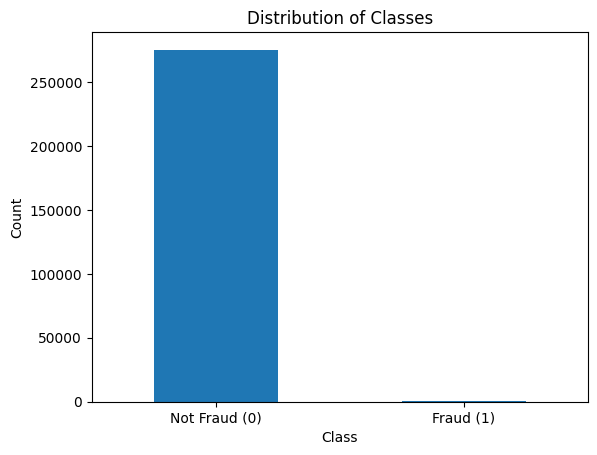

In [19]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()

#output shows it is very imbalanced dataset

# **Splitting Dataset**

In [20]:
#Dividing dataset into dependant and dependant features
X=df.drop('Class',axis=1)
y=df['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **Model Selection & Training**

In [23]:
#importing models from libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [24]:
lr_model = LogisticRegression()
Dtc_model=DecisionTreeClassifier()
Rf_model=RandomForestClassifier()
svc_model = SVC()

In [25]:
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
Dtc_model.fit(X_train, y_train)
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

# **Model Evaluation**

In [27]:
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

Dtc_pred = Dtc_model.predict(X_test)
Dtc_accuracy = accuracy_score(y_test, Dtc_pred)

Rf_pred = Rf_model.predict(X_test)
Rf_accuracy = accuracy_score(y_test, Rf_pred)

svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

In [32]:
# Calculate precision scores
lr_precision_score = precision_score(y_test, lr_pred)
svc_precision_score = precision_score(y_test, svc_pred)
Dtc_precision_score = precision_score(y_test, Dtc_pred)
Rf_precision_score = precision_score(y_test, Rf_pred)

# Calculate recall scores
lr_recall_score = recall_score(y_test, lr_pred)
svc_recall_score = recall_score(y_test, svc_pred)
Dtc_recall_score = recall_score(y_test, Dtc_pred)
Rf_recall_score = recall_score(y_test, Rf_pred)

# Calculate F1 scores
lr_f1_score = f1_score(y_test, lr_pred)
svc_f1_score = f1_score(y_test, svc_pred)
Dtc_f1_score = f1_score(y_test, Dtc_pred)
Rf_f1_score = f1_score(y_test, Rf_pred)


model_performance_dict = {
    'Logistic Regression': {
        'Accuracy': lr_accuracy,
        'Precision': lr_precision_score,
        'Recall': lr_recall_score,
        'F1 Score': lr_f1_score
    },
    'Support Vector Classifier': {
        'Accuracy': svc_accuracy,
        'Precision': svc_precision_score,
        'Recall': svc_recall_score,
        'F1 Score': svc_f1_score
    },
    'Decision Tree Classifier': {
        'Accuracy': Dtc_accuracy,
        'Precision': Dtc_precision_score,
        'Recall': Dtc_recall_score,
        'F1 Score': Dtc_f1_score
    },
    'Random Forest Classifier': {
        'Accuracy': Rf_accuracy,
        'Precision': Rf_precision_score,
        'Recall': Rf_recall_score,
        'F1 Score': Rf_f1_score
    }
}

In [33]:
# Create a pandas DataFrame from the dictionary for better display
performance_df = pd.DataFrame(model_performance_dict).T

# Display the performance table
print("Model Performance Metrics:")
display(performance_df)

Model Performance Metrics:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.999256,0.890625,0.626374,0.735484
Support Vector Classifier,0.999329,0.935484,0.637363,0.758170
Decision Tree Classifier,0.998948,0.666667,0.725275,0.694737
Random Forest Classifier,0.999401,0.891892,0.725275,0.800000


In [ ]:
#ACCURACY IS HIGH BUT PRECSION SCORE IS LESS SO IT IS IMBALANCED DATASET,
# iF all of 4 values i.e accuracy,precision score, recall and f1score are nearly equal that means your model is perfect,
#our task is to inrease precsion recall and f1 score
# we have to handle data imbalance now
# THERE ARE 2 METHODS ONE IS OVERSAMPLING AND OTHER IS UNDERSAMPLING..so we have to apply these techniques

#Undersampling:If u have less num of data i.e 473, so remove all the values except 473 columns or 473 entities but prob is your data becomes lost b/c 275190 data will gone
#Oversampling: here we have to work on minority class and making low value i.e 473 to 275190


In [ ]:
# | Feature            | **Oversampling**                 | **Undersampling**                |
# | ------------------ | -------------------------------- | -------------------------------- |
# | Affects            | Minority class                   | Majority class                   |
# | Data Added/Removed | Adds new samples                 | Removes existing samples         |
# | Risk               | Overfitting                      | Loss of information              |
# | Speed              | Slower (more data)               | Faster (less data)               |
# | Useful When        | Minority class is **very small** | Majority class is **very large** |

# **Handling Class Imbalance**

In [34]:
#Undersampling

normal=df[df['Class']==0] #taking all of the class having zero
fraud=df[df['Class']==1]

In [35]:
normal.shape
#this is normal data

(275190, 30)

In [36]:
fraud.shape

(473, 30)

In [37]:
#converting normal data to fraud data,taking sample of 473,so my sample is taken
normal_sample=normal.sample(n=473)

In [38]:
normal_sample.shape
#now add it in my dataset from fraud into normal using pandas

(473, 30)

In [39]:
new_data=pd.concat([normal_sample,fraud], ignore_index=True)
#now add it in my dataset

In [40]:
new_data.head()
#now this is dataset which has 473 rows and 30 columns

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.877827,0.694081,1.882341,0.937525,-0.243859,0.756814,0.589793,0.290153,-0.692871,-0.067201,...,-0.078892,-0.375034,-0.044723,-0.377771,-0.018106,-0.399629,0.001925,0.069792,0.098554,0
1,-1.101790,0.485508,1.893394,2.212792,0.218960,-0.033739,0.297460,0.172872,-0.684043,0.548108,...,-0.005292,0.249476,0.238495,0.524734,0.192117,0.010862,-0.124932,-0.055218,-0.325843,0
2,2.013626,-1.151679,-2.266915,-1.186648,1.607079,3.627238,-1.107016,0.856906,-0.443864,0.891822,...,-0.364709,-0.670296,0.293087,0.681305,-0.296313,0.242727,-0.005197,-0.045031,-0.097752,0
3,-0.817820,-0.849112,0.392417,-1.489463,0.864837,-0.664427,0.616823,-0.664507,-0.306024,0.914434,...,-0.293702,0.549355,0.321735,-0.311605,-0.626429,-0.037192,-0.373353,-0.200693,-0.349231,0
4,-0.292104,1.140792,1.846438,1.426615,-0.191952,-0.356354,0.449629,-0.141313,-0.708528,0.051502,...,-0.040225,-0.064687,0.017043,0.398566,-0.583651,-0.466774,0.076086,0.178744,-0.301294,0


In [41]:
new_data['Class'].value_counts()

#Now the problem is data lost b/c we are having 275190 data but now only 473 data
#so my recommendation is better go for oversampling
#do this by dividing data into train test split again

,count
Class,
0,473
1,473


In [42]:
#Now moving to oversampling
X=new_data.drop('Class',axis=1)
y=new_data['Class']
#Now our dataset is divided into dependant and independant features

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
#Oversampling
#If we have 473 data,we are taking minority class
#increasing the fraud
#Dividing the dataset into dependant and independant feature

X=df.drop('Class',axis=1)
y=df['Class']

In [45]:
X.shape

(275663, 29)

In [46]:
y.shape

(275663,)

**SMOTE**

Generate synthetic samples using techniques like SMOTE(Synthetic Minority Over-sampling Technique) to increase target classes variable

In [47]:
from imblearn.over_sampling import SMOTE

#like before 473 now 275663 in y.shape
#Increases the number of minority class samples to balance the dataset.

In [ ]:
#Here we are using fit and resample not transform b/c i have 473 data for 1 while for zero 257663 so i can resample them not transform b/c
#fit_transform is used when we have to learn from data and transform it LIKE IN STANDARD SCALER
#fit_resample is used when we have to rebalance tha dataset in SMOTE

In [48]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [49]:
y_res.value_counts()
#output shows now zero and 1 convert into same numnber of classes
#now applying mL algorithms
#Now all 4 values become closer or increase

,count
Class,
0,275190
1,275190


In [50]:
#Now applying ML algorithms
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [51]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lr=LogisticRegression()
svc=SVC()

In [52]:
dtc.fit(X_res, y_res)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC()

In [54]:
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

Dtc_pred = Dtc_model.predict(X_test)
Dtc_accuracy = accuracy_score(y_test, Dtc_pred)

Rf_pred = Rf_model.predict(X_test)
Rf_accuracy = accuracy_score(y_test, Rf_pred)

svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

In [55]:
# Calculate and display performance metrics for all models after SMOTE
model_performance = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, lr.predict(X_test)),
        'Precision': precision_score(y_test, lr.predict(X_test)),
        'Recall': recall_score(y_test, lr.predict(X_test)),
        'F1 Score': f1_score(y_test, lr.predict(X_test))
    },
    'Support Vector Classifier': {
        'Accuracy': accuracy_score(y_test, svc.predict(X_test)),
        'Precision': precision_score(y_test, svc.predict(X_test)),
        'Recall': recall_score(y_test, svc.predict(X_test)),
        'F1 Score': f1_score(y_test, svc.predict(X_test))
    },
    'Decision Tree Classifier': {
        'Accuracy': accuracy_score(y_test, dtc.predict(X_test)),
        'Precision': precision_score(y_test, dtc.predict(X_test)),
        'Recall': recall_score(y_test, dtc.predict(X_test)),
        'F1 Score': f1_score(y_test, dtc.predict(X_test))
    },
    'Random Forest Classifier': {
        'Accuracy': accuracy_score(y_test, rfc.predict(X_test)),
        'Precision': precision_score(y_test, rfc.predict(X_test)),
        'Recall': recall_score(y_test, rfc.predict(X_test)),
        'F1 Score': f1_score(y_test, rfc.predict(X_test))
    }
}

# Create a pandas DataFrame from the dictionary for better display
performance_df = pd.DataFrame(model_performance).T

# Display the performance table
print("Model Performance Metrics:")
display(performance_df)

#Output shows this is how u can habndle the imbalance datset

Model Performance Metrics:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.944011,0.972981,0.913314,0.942204
Support Vector Classifier,0.980595,0.983060,0.978019,0.980533
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest Classifier,0.999918,0.999836,1.000000,0.999918


| Model                         | Recommendation                                                                                        |
| ----------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Random Forest Classifier**  | ✅ **Best overall** (high recall, almost perfect precision, less likely to overfit than Decision Tree) |
| **Support Vector Classifier** | ✅ **Great alternative** if you prefer a lighter model with excellent generalization                   |
| **Decision Tree**             | ⚠️ **Too perfect — likely overfitting**                                                               |
| **Logistic Regression**       | ✅ Decent baseline, but outperformed by others                                                         |


# **🔹Results**

“We experimented with algorithms such as Decision Tree, Random Forest, and Logistic Regression, as these models are interpretable and work well with structured data.”

Choose Random Forest Classifier as the best model based on your current results — it gives you high recall (catches all frauds) and very few false positives, which is exactly what you want in a fraud detection system.

“The Random Forest classifier achieved the best results, with a recall of 100% and accuracy 99%, making it effective in detecting fraudulent transactions with low false negatives.”

# **Saving Model**

In [62]:
#For saving the model
#Now we are training my machine learning model so that it can be reuse it later without retraining:
import numpy as np
import joblib

In [63]:
joblib.dump(dtc,'credit_card_dtc.pkl')#now it is dump inside your working directory
joblib.dump(rfc,'credit_card_rfc.pkl')
joblib.dump(lr,'credit_card_lr.pkl')
joblib.dump(svc,'credit_card_svc.pkl')

['credit_card_svc.pkl']

In [64]:
#loading model

model = joblib.load('credit_card_dtc.pkl')

In [65]:
#Copy all values except time
pred= model.predict([[-5.40125766315825, -5.45014783420644, 1.18630463143652, 1.73623880012095, 3.04910587764025, -1.76340557365201, -1.55973769907953, 0.160841747266769, 1.23308974041888, -5.40125766315825, -5.45014783420644, 1.18630463143652, 1.73623880012095, 3.04910587764025, -1.76340557365201, -1.55973769907953, 0.160841747266769, 1.23308974041888, -5.40125766315825, -5.45014783420644, 1.18630463143652, 1.73623880012095, 3.04910587764025, -1.76340557365201, -1.55973769907953, 0.160841747266769, 1.23308974041888, -5.40125766315825, -5.45014783420644]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
pred[0]

np.int64(0)

In [61]:
if pred==0:
  print("Normal Transaction")
else:
  print("Fraud Transaction")

Normal Transaction


In [ ]:
#Now from now u can find out that incoming transactions are fraud or not

**🔹 1. Summary of the Project**

“In this project, we developed a credit card fraud detection system using traditional machine learning techniques. The aim was to accurately identify fraudulent transactions from a highly imbalanced dataset.”

**🔹 2. Evaluation Metrics**

“Given the class imbalance, we relied on metrics like precision, recall, F1-score and accuracy, to ensure the model performs well in identifying fraud cases.”

**🔹 3. Challenges Faced**

Imbalanced dataset

Choosing the right features

Avoiding overfitting

Preprocessing and scaling

**🔹 4. Conclusion**

“Traditional machine learning methods, when properly tuned and evaluated, can be powerful tools for fraud detection. However, continuous updates and monitoring are necessary as fraud patterns evolve.”

**🔹 5. Future Work / Improvements**

Use advanced models like xgboost through pycaret
Try deep learning for sequence-based fraud
Implement real-time fraud detection